In [15]:
import tensorflow
from tensorflow import keras

#keras is the library of Tensorflow framework

In [16]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#mnist dataset is available in keras so directly load in our variables

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [18]:
print(x_train[0])

#how 28 * 28 gray scale image pixel values look like

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [19]:
print(y_train[0])

#answer of the first image

5


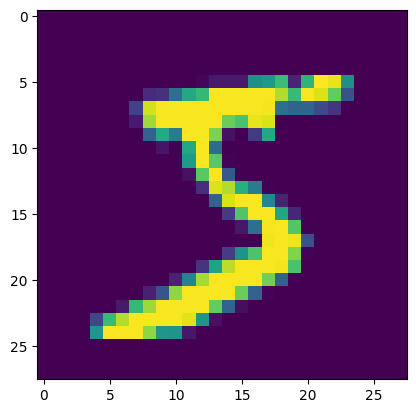

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

#show first image

In [21]:
x_train=x_train/255
x_test=x_test/255

#generalize the pixel value so that reduce computational cost

In [22]:
x_train[0]

#1st image after generalization

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
from keras import Sequential
from keras.layers import Dense,Flatten

#when want to train model sequentially then we use Sequential class
#Dense class is used to establish fully connected network

In [24]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

#model architecture
#128 node/neurons in oth layer
#32 node in 1st layer
#10 node in 2nd layer

#when we do multiclass classification then last layer contain n no of nodes where n is the number of class present in our dataset.
#for this layer activation function should be softmax

In [25]:
model.summary()

#getting model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* formula to calculae trainable perameter for perticular layer,
* **no_of_pevious_layer_nodes * no_of_currunt_layer_nodes + no_of_currunt_layer_nodes**
* in 0th layer:
* trainable perameter= 784*128 + 128 =100480(28 * 28 pixels are there = 784)
* mapping, 784= no_of_input pixels as previous layer is input layer
*          128= no_of_currunt_layer_nodes(layer 0)
*          128= no_of_currunt_layer_nodes(layer 0)
* in 1st layer:
* trainable perameter= 128(Layer 0)*32(Layer 1) +32(Layer 1)=4128
* in 2nd layer:
* trainable perameter= 32(Layer 1)*10(Layer 2) + 10(Layer 2)=330
* **Total trainable perameters in the model= 100480 + 4128 + 330 = 104938**



In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#when we doing binary class classification then loss should be binary_crossentropy
#if select optimizer as Adam
#metrics=['accuracy']
#when I want to show accuracy along with loss during training the I have to pass dictionary like this

In [27]:
history = model.fit(x_train,y_train,epochs=50,validation_split=0.2)

#model training and store model in history

Epoch 1/50
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2806 - accuracy: 0.9171 - val_loss: 0.1568 - val_accuracy: 0.9525
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1207 - accuracy: 0.9640 - val_loss: 0.1196 - val_accuracy: 0.9653
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0824 - accuracy: 0.9751 - val_loss: 0.1018 - val_accuracy: 0.9704
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.0999 - val_accuracy: 0.9707
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.1022 - val_accuracy: 0.9703
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.1110 - val_accuracy: 0.9698
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.1055 - val_accuracy:

In [28]:
y_probability=model.predict(x_test)
y_probability

#testing the model
#model.predict() gives us the probability of the perticulat object belongs to one perticular class
#means let object = 3,then probability of 3 = 0, probability of 3 = 2, probability of 3 = 3,etc...
#in y_probability we stored each class probability
#we have to convert it such a way that it gives us only one answer


313/313 [==============================] - 1s 2ms/step


array([[7.9150827e-25, 2.0821890e-18, 8.4633036e-20, ..., 1.0000000e+00,
        1.9216511e-19, 6.7806316e-11],
       [3.2314047e-29, 7.0270007e-16, 1.0000000e+00, ..., 1.1107627e-27,
        1.1028030e-14, 2.9255873e-35],
       [8.1127895e-21, 1.0000000e+00, 6.3038312e-12, ..., 4.4515268e-13,
        5.5745620e-08, 3.8729158e-15],
       ...,
       [0.0000000e+00, 1.6038248e-26, 0.0000000e+00, ..., 2.7110307e-24,
        2.2060415e-28, 1.3174537e-20],
       [0.0000000e+00, 1.1803797e-38, 0.0000000e+00, ..., 2.5945572e-28,
        6.9088827e-15, 0.0000000e+00],
       [4.0351900e-31, 2.9169687e-38, 6.6297249e-30, ..., 0.0000000e+00,
        8.1518775e-36, 1.3991100e-34]], dtype=float32)

In [29]:
y_predict= y_probability.argmax(axis=1)
y_predict

# here argmax() function gives us the class whose probability is maximum

array([7, 2, 1, ..., 4, 5, 6])

*you can see that,

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

#when we do classification problem for model evaluation we use accuracy_score metrics

0.9767

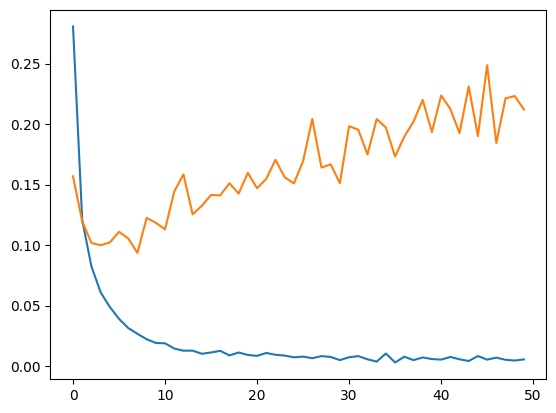

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#making graph between training loss and validation loss

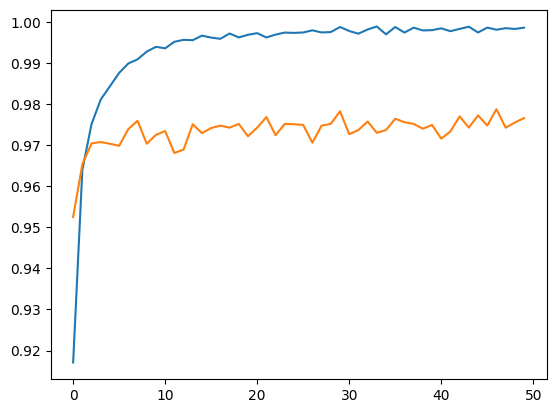

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#making graph betwee training accuracy and validation accuracy